# **Single Value Decomposition**


In This notebook I will use Single Value Decomposition in Image compression

**Steps**:
- Converting RGB image to Gray by 5 ways
- compress the gray image by Single Value Decomposition
- Try to compress it with diffrent k values
- find minimum k with good features
- calculate Ratio
- compare the quality of compressed image with original one by 4 diffrent methods





> Importing libs



In [2]:
#importing important libs
import numpy as np
import matplotlib.pyplot as plt
import cv2

#import libs for gray converting
from PIL import Image
import matplotlib.image as mpimg
import tensorflow as tf
from skimage import color, io



> Download the image



In [3]:
!wget "https://d3544la1u8djza.cloudfront.net/APHI/Blog/2016/10_October/persians/Persian+Cat+Facts+History+Personality+and+Care+_+ASPCA+Pet+Health+Insurance+_+white+Persian+cat+resting+on+a+brown+sofa-min.jpg" cat_image.png

--2024-02-27 17:11:18--  https://d3544la1u8djza.cloudfront.net/APHI/Blog/2016/10_October/persians/Persian+Cat+Facts+History+Personality+and+Care+_+ASPCA+Pet+Health+Insurance+_+white+Persian+cat+resting+on+a+brown+sofa-min.jpg
Resolving d3544la1u8djza.cloudfront.net (d3544la1u8djza.cloudfront.net)... 108.156.93.173, 108.156.93.29, 108.156.93.139, ...
Connecting to d3544la1u8djza.cloudfront.net (d3544la1u8djza.cloudfront.net)|108.156.93.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71290 (70K) [image/jpeg]
Saving to: ‘Persian+Cat+Facts+History+Personality+and+Care+_+ASPCA+Pet+Health+Insurance+_+white+Persian+cat+resting+on+a+brown+sofa-min.jpg’

Persian+Cat+Facts+H 100%[===================>]  69.62K  --.-KB/s    in 0.01s   

2024-02-27 17:11:18 (5.50 MB/s) - ‘Persian+Cat+Facts+History+Personality+and+Care+_+ASPCA+Pet+Health+Insurance+_+white+Persian+cat+resting+on+a+brown+sofa-min.jpg’ saved [71290/71290]

--2024-02-27 17:11:18--  http://cat_image.png/
Res

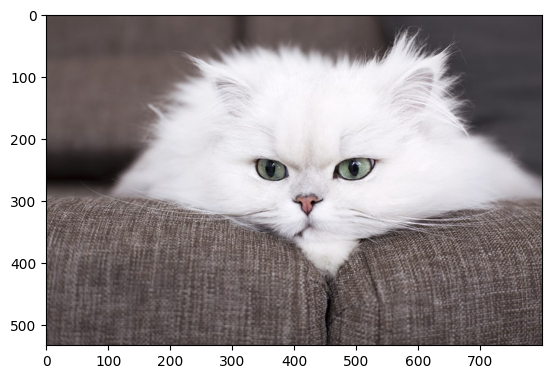

In [4]:
#read and desplay original image
image_path = "/content/Persian+Cat+Facts+History+Personality+and+Care+_+ASPCA+Pet+Health+Insurance+_+white+Persian+cat+resting+on+a+brown+sofa-min.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)



> Converting RGB image to Gray by 5 ways

In [5]:
#convert to gray image by 5 diffrent ways
def convert_to_grayscale_pillow(image_path):
  # Read the image
  img = Image.open(image_path)
  # Convert to grayscale
  gray_img = img.convert('L')
  return gray_img

def convert_to_grayscale_opencv(image_path):
  # Read the image
  img_rgb = cv2.imread(image_path)
  # Convert to grayscale
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
  return img_gray


def convert_to_grayscale_numpy_matplotlib(image_path):
  # Read the image
  img = mpimg.imread(image_path)
  # Convert to grayscale
  weights = [0.2989, 0.5870, 0.1140]
  img_gray = np.dot(img[..., :3], weights)
  return img_gray

def convert_to_grayscale_scikit_image(image_path):
    # Read the image
    img = io.imread(image_path)
    # Convert to grayscale
    grayscale_img = color.rgb2gray(img)
    return grayscale_img

def convert_to_grayscale_tensorflow(image_path):
  # Read the image
  img = tf.io.read_file(image_path)
  # Convert to grayscale
  img = tf.image.decode_jpeg(img, channels=1)
  return img

Text(0.5, 1.0, 'tensorflow')

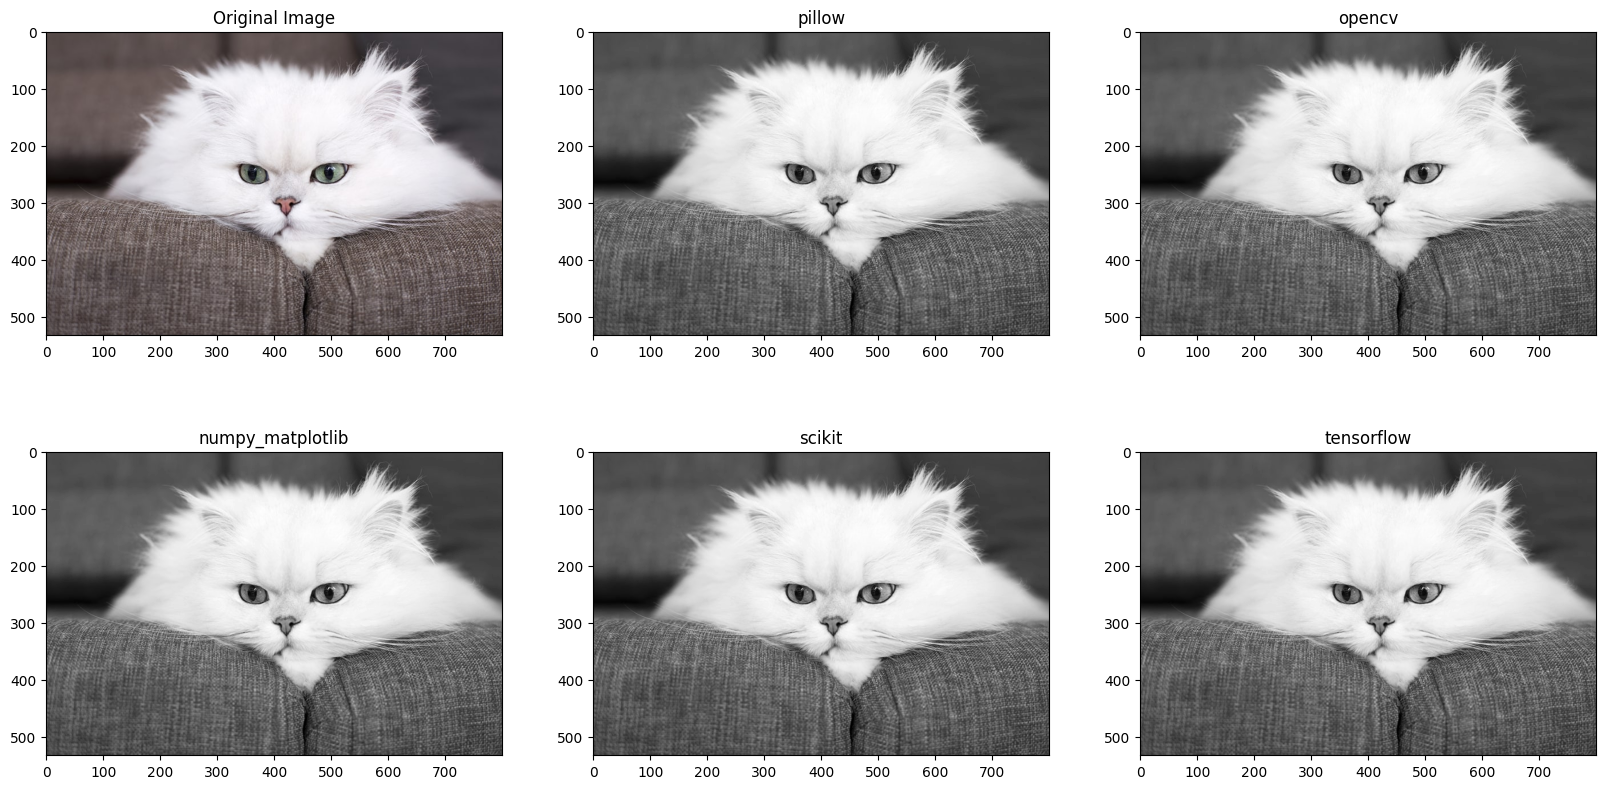

In [6]:
# Display the original and compressed images
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')

#check way 1 to convert to gray
plt.subplot(2, 3, 2)
plt.imshow(convert_to_grayscale_pillow(image_path), cmap='gray')
plt.title("pillow")

#check way 2 to convert to gray
plt.subplot(2, 3, 3)
plt.imshow(convert_to_grayscale_opencv(image_path), cmap='gray')
plt.title('opencv')

#check way 3 to convert to gray
plt.subplot(2, 3, 4)
plt.imshow(convert_to_grayscale_numpy_matplotlib(image_path), cmap='gray')
plt.title('numpy_matplotlib')

#check way 4 to convert to gray
plt.subplot(2, 3, 5)
plt.imshow(convert_to_grayscale_scikit_image(image_path), cmap='gray')
plt.title('scikit')

#check way 5 to convert to gray
plt.subplot(2, 3, 6)
plt.imshow(convert_to_grayscale_tensorflow(image_path), cmap='gray')
plt.title('tensorflow')

In [31]:
original_image = convert_to_grayscale_opencv(image_path)
original_image.shape

(533, 800)



> Compress the gray image by Single Value Decomposition





 Try to compress it with diffrent k values



In [32]:
#do compresion func
def compress_image(original_image, k):

    # Convert the image to grayscale if it's in color
    if len(original_image.shape) == 3:
        original_image = np.mean(original_image, axis=2)

    # Perform SVD
    U, S, VT = np.linalg.svd(original_image, full_matrices=False)

    # Truncate to retain only the first 'k' singular values/vectors
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]

    # Reconstruct the compressed image
    compressed_image = np.dot(U_k, np.dot(S_k, VT_k))

    # Display the original and compressed images
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Compressed Image (k={k})')

    plt.show()
    return compressed_image


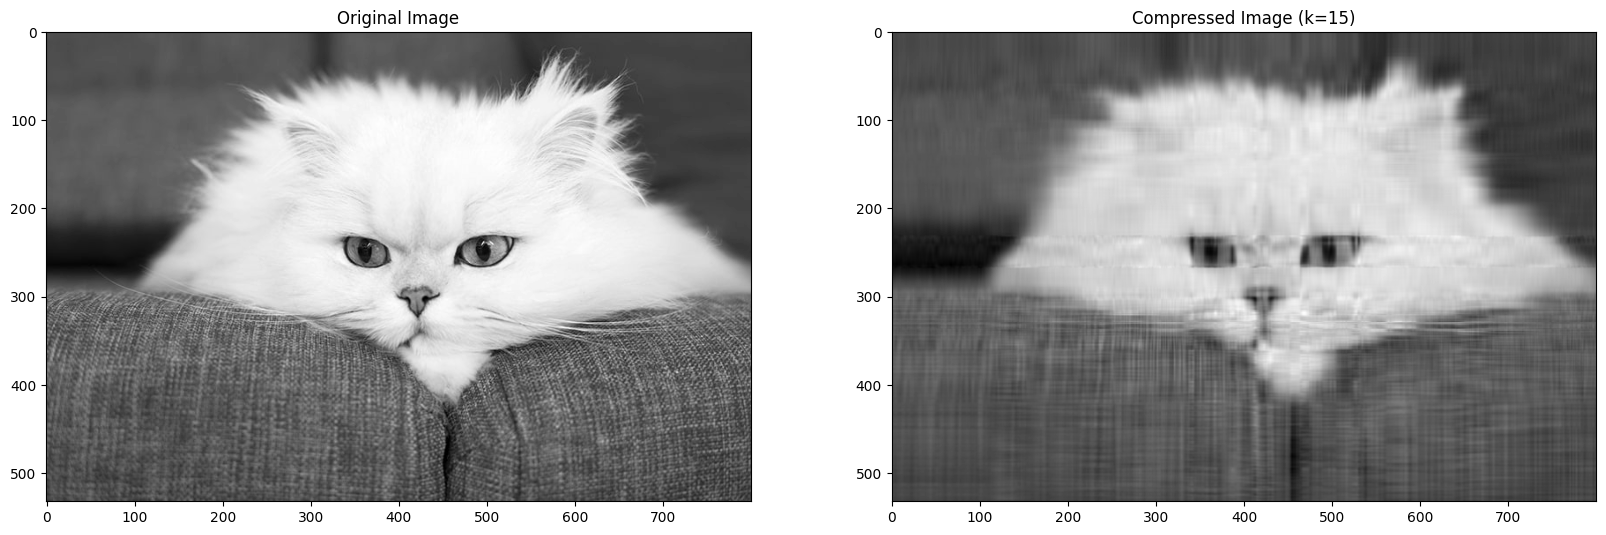

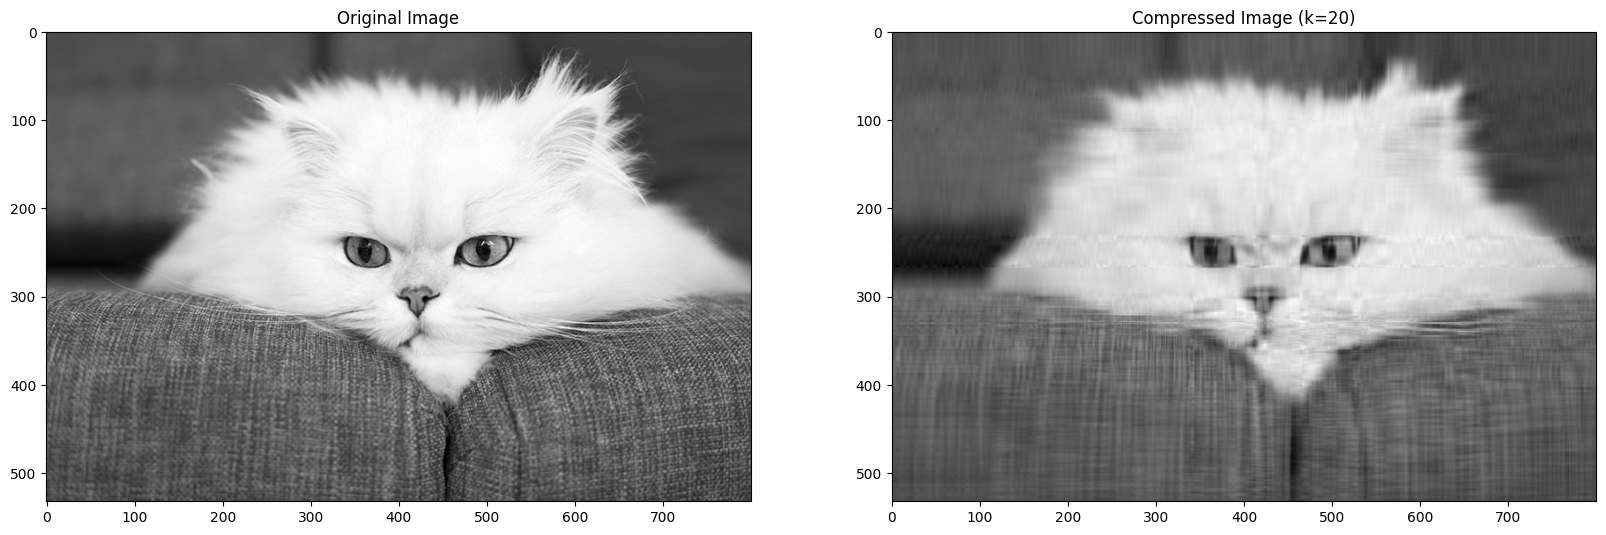

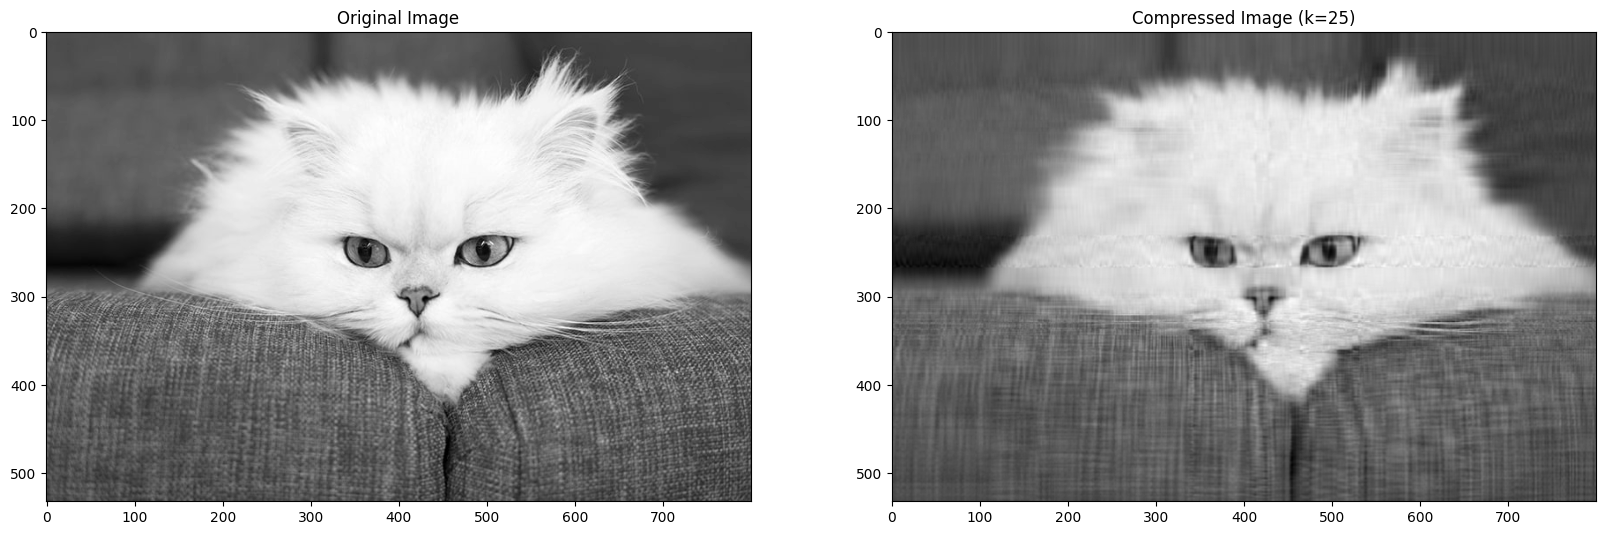

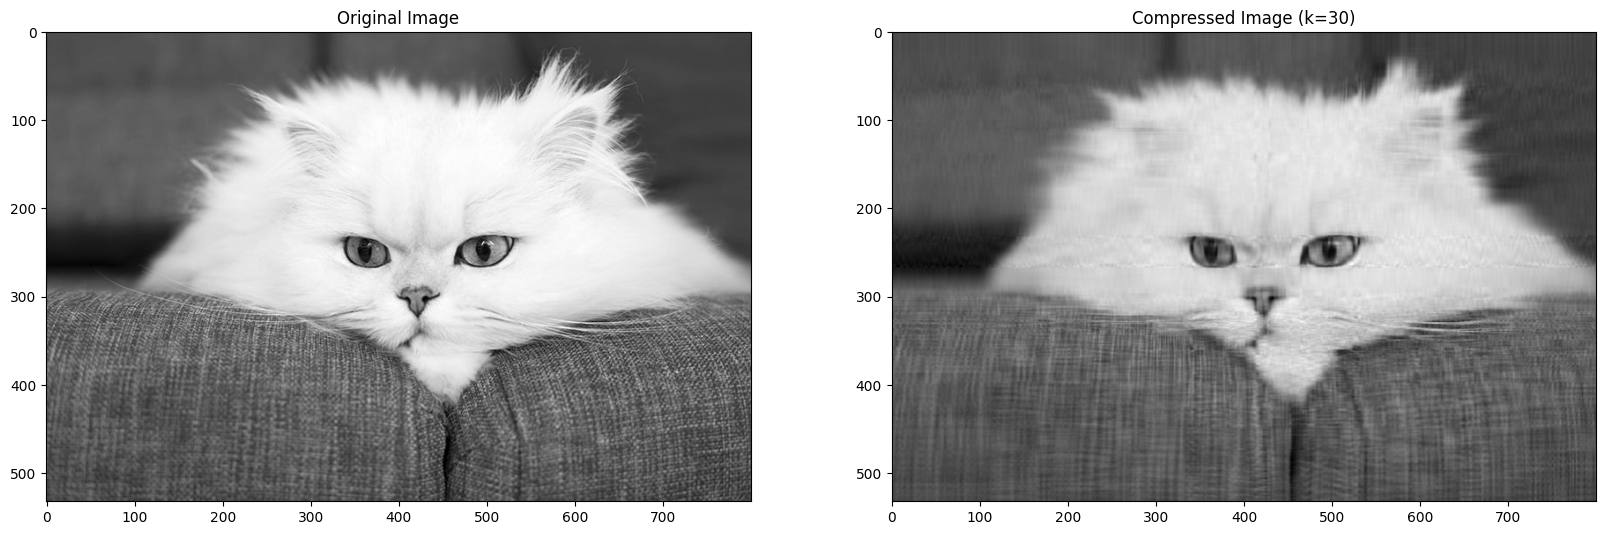

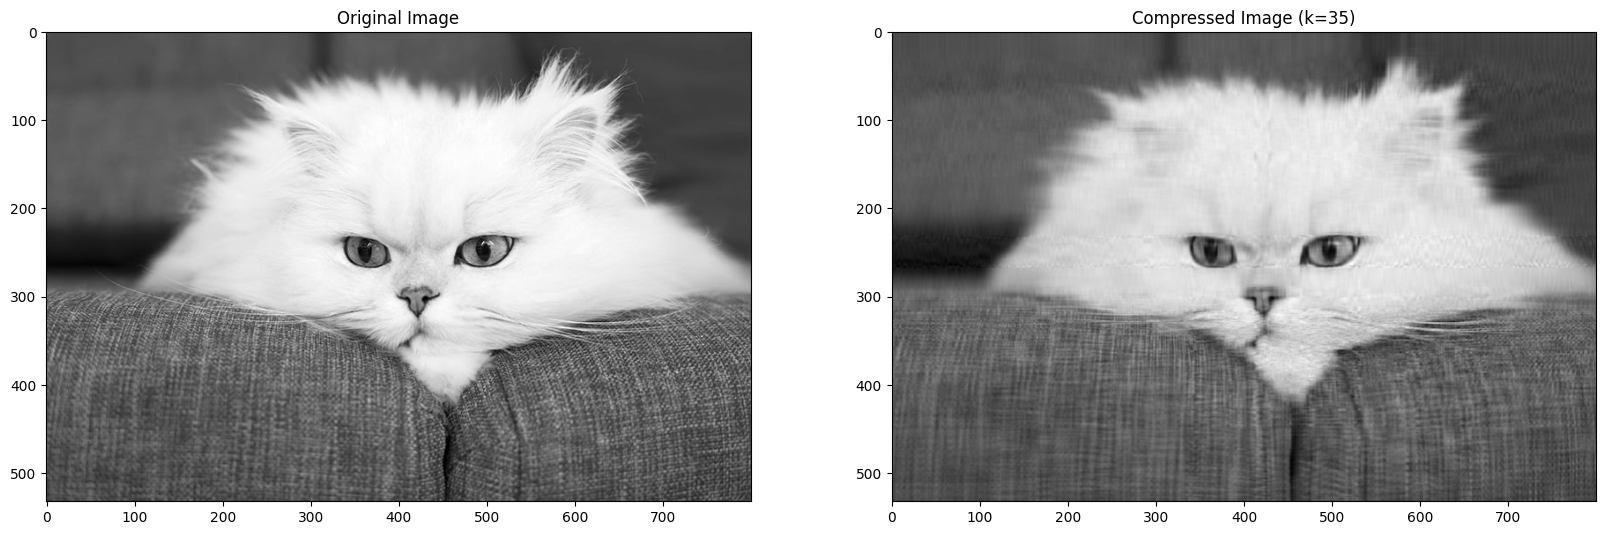

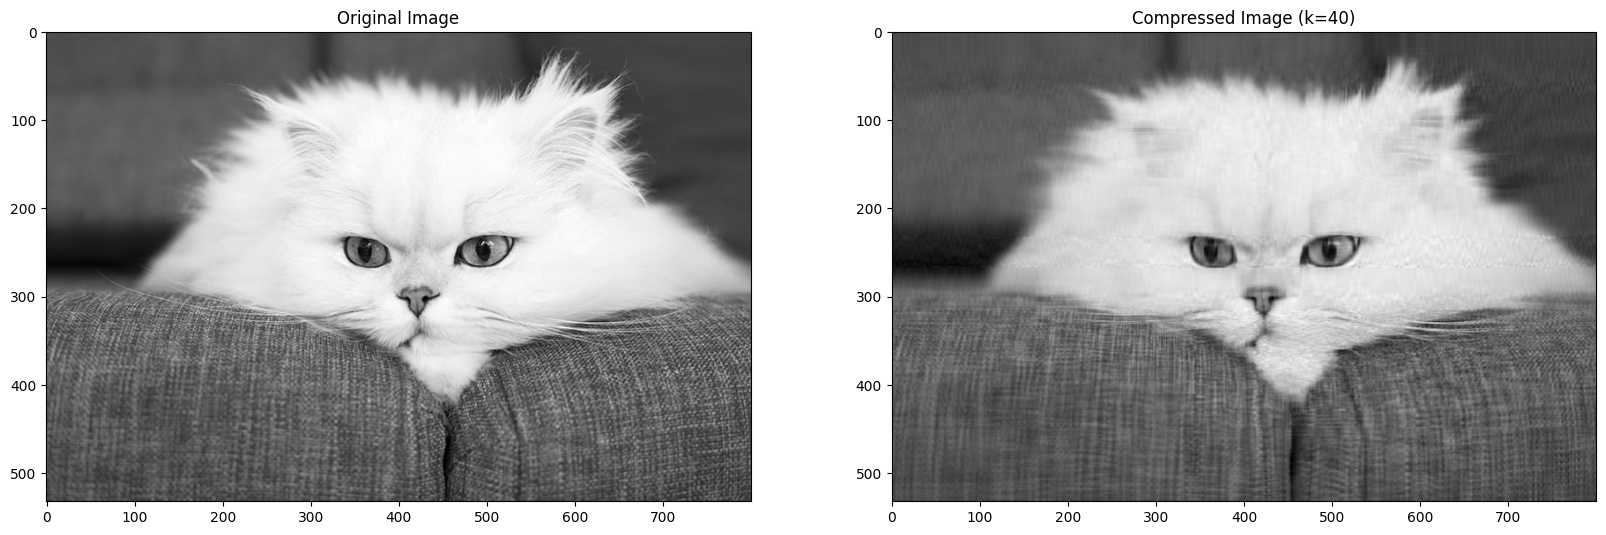

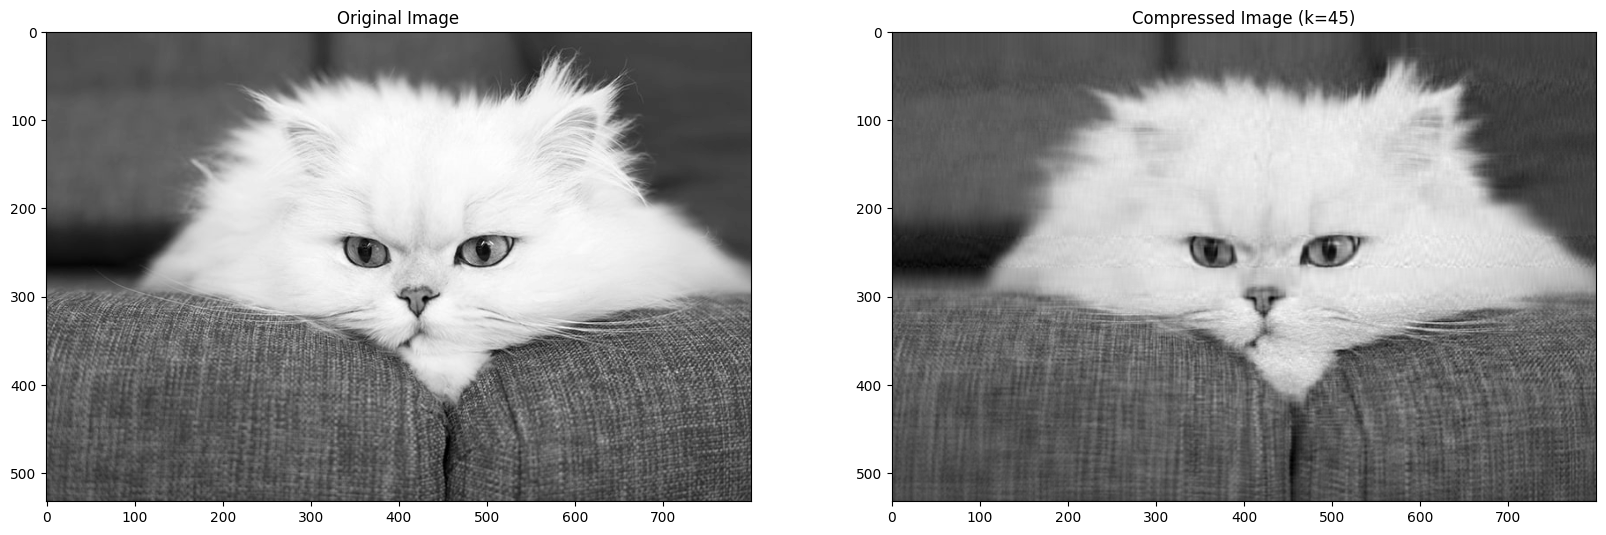

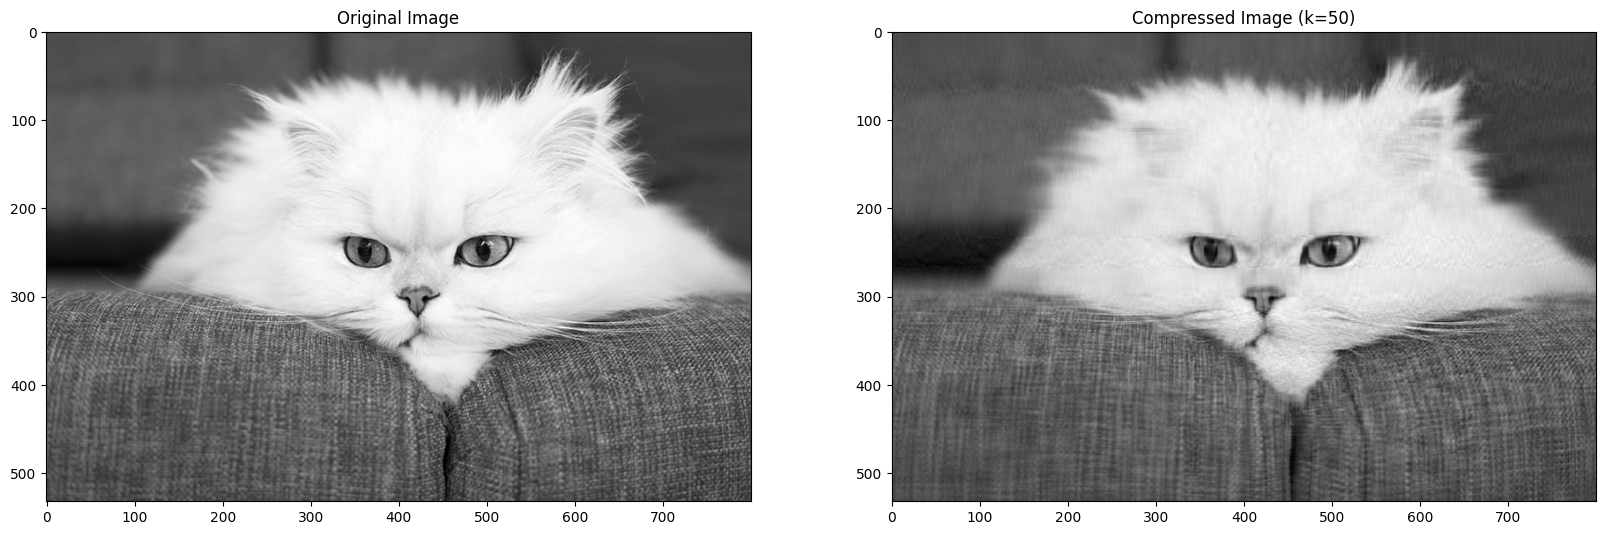

In [33]:
kset = [15,20,25,30,35,40,45,50]
for k in kset:
  compress_image(original_image, k )



> find minimum k with good features




In [34]:
#the min of k of D in UDV
print(f"minimum k is 35")

minimum k is 35




> calculate Ratio



In [35]:
#calculate the ratio
r = ((original_image.shape[0]*k + k+ k*original_image.shape[1]) /( original_image.shape[0] * original_image.shape[1]) ) *100
print(f'Ratio is : {r:.2f}%')

Ratio is : 15.64%


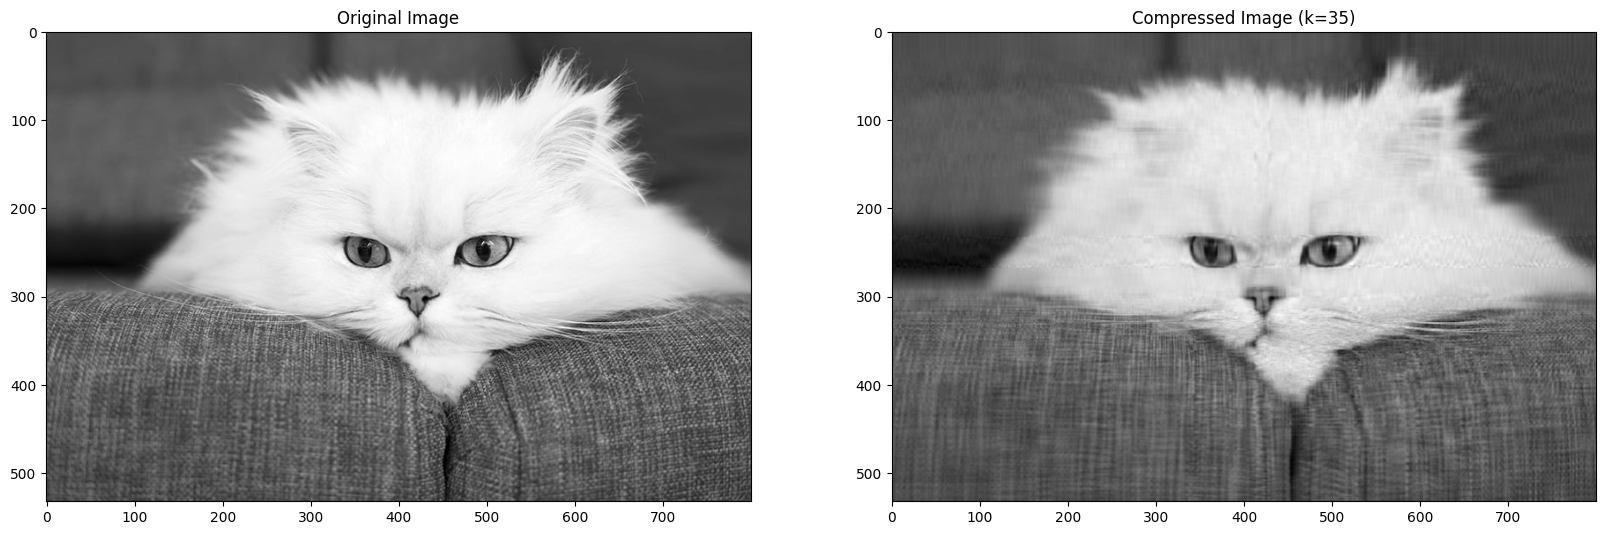

In [36]:
compressed_image = compress_image(original_image, 35 )

In [38]:
print(f"compressed_image shape {compressed_image.shape}")
print(f"original_image shap {original_image.shape}")

compressed_image shape (533, 800)
original_image shap (533, 800)


"

>Compare the quality of compressed image with original one by 4 diffrent methods



In [37]:
from skimage.metrics import mean_squared_error, structural_similarity, peak_signal_noise_ratio
from sklearn.metrics.pairwise import cosine_similarity

# Load the original and compressed images
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(original_image, compressed_image)

# Calculate Structural Similarity Index (SSIM)
ssim = structural_similarity(original_image, compressed_image)

# Calculate Peak Signal-to-Noise Ratio (PSNR)
psnr = peak_signal_noise_ratio(original_image, compressed_image)

# Flatten the images to 1D arrays
vector1 = original_image.flatten().reshape(1, -1)
vector2 = compressed_image.flatten().reshape(1, -1)

# Compute the cosine similarity
similarity = cosine_similarity(vector1, vector2)[0][0]

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
<ipython-input-37-997ff1b797db>:12: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original_image, compressed_image)


In [39]:
#print the values
print(f"PSNR: {psnr:.2f}")
print(f"SSIM: {ssim:.4f}")
print(f"MSE: {mse:.2f}")
print(f"Cosine Similarity:{ similarity}")

PSNR: 28.05
SSIM: 0.7684
MSE: 101.92
Cosine Similarity:0.9977237353362471




> save the compressed Image



In [40]:
#Save the image
cv2.imwrite("compressed_image.jpg",compressed_image)

True